# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

# Carga de Datos

In [2]:
data = pd.read_csv("wholesale.csv")

print(data.shape)
print(data.isnull().sum())
print(data.dtypes)
data.head()

# Tenemos 440 ejemplos con 8 características
# Columnas:
# Channel: Hotel/Restaurante/Cafetería o canal minorista
# Region: Lisboa, Oporto u otra
# Fresh: gasto anual (u.m.) en productos frescos
# Milk: gasto anual (u.m.) en productos lácteos
# Grocery: gasto anual (u.m.) en productos de abarrotes
# Frozen: gasto anual (u.m.) en productos congelados 
# Detergents_Paper: gasto anual (u.m.) en detergentes y productos de papel
# Delicassen: gasto anual (u.m.) en productos y charcutería

(440, 8)
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Estadística Descriptiva

In [3]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


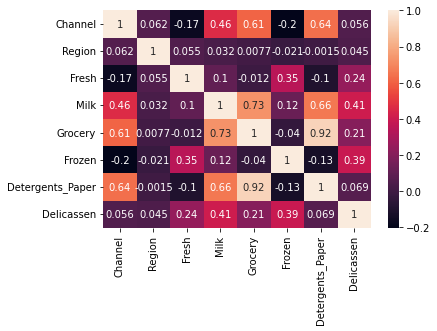

In [4]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

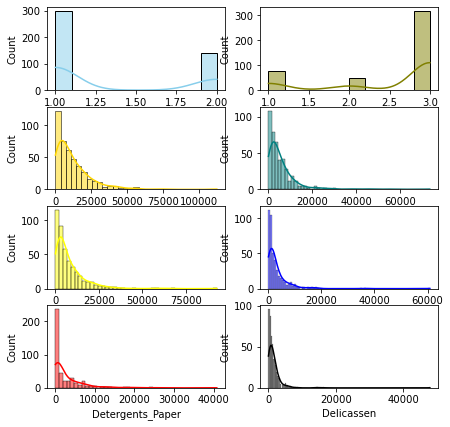

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(7, 7))

sns.histplot(data=data, x="Channel", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="Region", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="Fresh", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="Milk", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data, x="Grocery", kde=True, color="yellow", ax=axs[2, 0])
sns.histplot(data=data, x="Frozen", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=data, x="Detergents_Paper", kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=data, x="Delicassen", kde=True, color="black", ax=axs[3, 1])

plt.show()

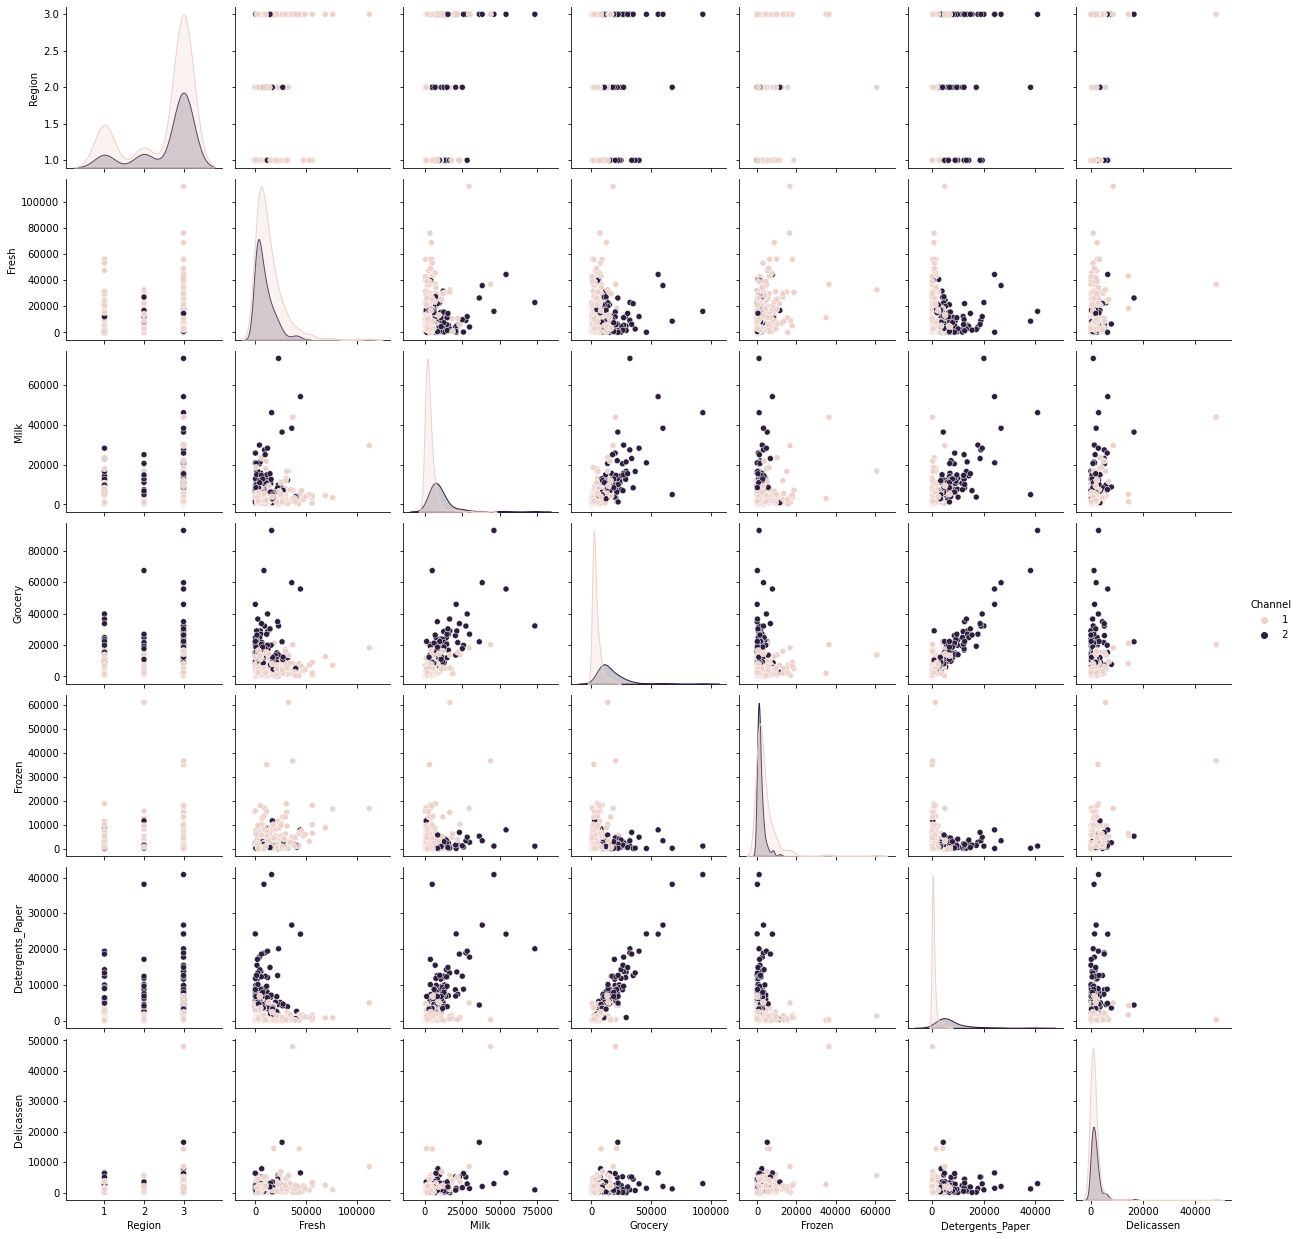

In [6]:
sns.pairplot(data, hue="Channel")
plt.show()

In [7]:
# En el gráfico anterior, se puede notar que la característica "Region" no tiene correlación 
# con alguna otra columna. 

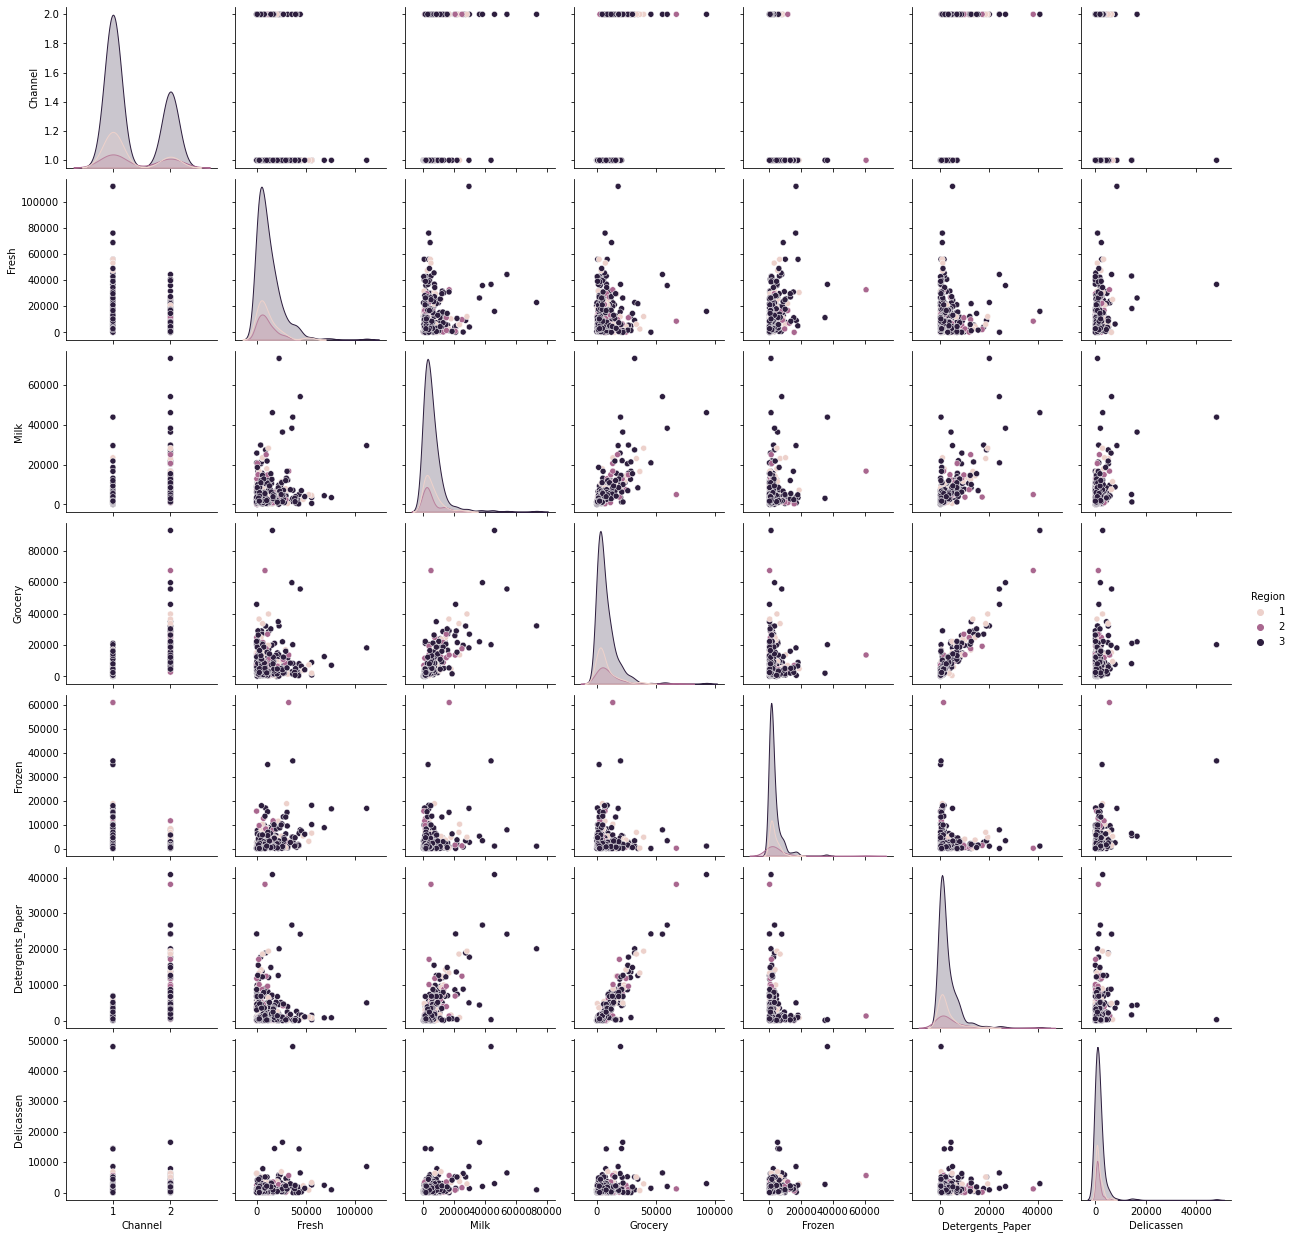

In [8]:
sns.pairplot(data, hue="Region")
plt.show()

In [9]:
# En el gráfico anterior, se puede notar que la característica "Channel" no tiene correlación 
# con alguna otra columna.

In [10]:
# Puesto que este es un problema No Supervisado, entonces debemos buscar una forma de ver 
# y analizar nuestros resultados. Seleccionamos algunos datos al azar para posteriormente
# verificar el clúster al que pertenecen

indices = [26, 176, 392]
muestras = pd.DataFrame(data.loc[indices], columns=data.columns).reset_index(drop=True)

muestras.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,9898,961,2861,3151,242,833
1,1,3,45640,6958,6536,7368,1532,230
2,1,3,518,4180,3600,659,122,654


In [11]:
# Eliminamos estas filas del dataframe "data", para que el algoritmo no entrene con ellas
data = data.drop(indices, axis=0).reset_index(drop=True)

In [12]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
432,1,3,29703,12051,16027,13135,182,2204
433,1,3,39228,1431,764,4510,93,2346
434,2,3,14531,15488,30243,437,14841,1867
435,1,3,10290,1981,2232,1038,168,2125


In [13]:
# Finalmente, eliminamos las columnas "Region" y "Channel", que, como vimos anteriormente,
# no aportan información relevante para la agrupación, ya que nos interesa conocer las
# relaciones entre los productos más vendidos. 
data = data.drop(["Region", "Channel"], axis=1)
muestras = muestras.drop(["Region", "Channel"], axis=1)

# Escalamiento de los Datos

In [14]:
from sklearn import preprocessing

data_scaled = preprocessing.Normalizer().fit_transform(data)

muestras_scaled = preprocessing.Normalizer().fit_transform(muestras)

# Modelo para la Agrupación

In [15]:
from sklearn.cluster import KMeans

X = data_scaled.copy()

# Para encontrar el valor óptimo de k, usamos el método del codo. Ejecutamos el algoritmo
# para varios valores de k

inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

Gráfica de la Inercia vs Número de Clústers

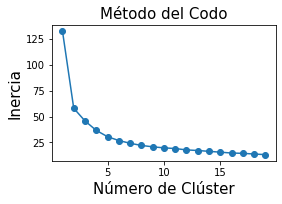

In [17]:
plt.figure(figsize=[4,2.5])
plt.title("Método del Codo", size=15)
plt.xlabel("Número de Clúster", size=15)
plt.ylabel("Inercia",size=15)
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()

In [18]:
# El codo está en la región de k=5 y k=6. Tomemos k=6
algoritmo = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)

# Entrenamos el modelo
algoritmo.fit(X)

# Obtenemos los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

# Evaluamos el modelo con los datos "muestras"
muestras_prediccion = algoritmo.predict(muestras_scaled)

In [21]:
muestras_prediccion

array([3, 3, 5], dtype=int32)

# Gráfica de los resultados

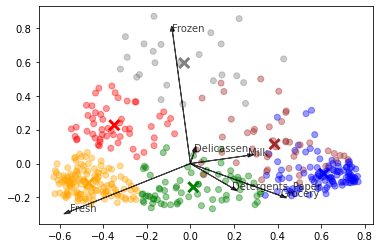

In [33]:
# Realizamos una reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components=2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

# Realizamos una reducción de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Definimos los colores de cada clúster
colores = ["blue", "red", "green", "orange", "gray", "brown"]

# Asignamos los colores a cada clúster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

# Graficamos los componentes PCA
plt.scatter(pca[:,0], pca[:,1], c=colores_cluster, marker='o', alpha=0.4)

# Graficamos los centroides
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='x', s=100,
           linewidth=3, c=colores)

# Guardamos los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0]*max(pca[:,0])
yvector = modelo_pca.components_[1]*max(pca[:,1])
columnas = data.columns

# Graficamos los nombres de los clústers con la distancia del vector
for i in range(len(columnas)):
    # Graficamos los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color="black", width=0.0005, head_width=0.02,
             alpha=0.75)
    # Colocamos los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color="black", alpha=0.75)
    
plt.show()    